# 🚗 Used Car Analysis Project
#### _by Sam Buwalda | Portfolio Project, 2025_

This notebook continues the project by answering five business-focused questions using visual and statistical analysis.  
The dataset used here was cleaned and prepared in a separate notebook.

If needed, see **“Data Cleaning & Preparation.ipynb”** for details on data preprocessing steps.

---

## 📦💾 Importing and loading CSV file

In [ ]:
# Import pandas for data loading, inspection, and cleaning
import pandas as pd

# Load the CSV file and load into DataFrame 'df'

df = pd.read_csv("../Data Files/vehicles_cleaned.csv", low_memory=False)

# Display general information about the dataset: column names, data types, non-null counts, and memory usage.

df.info()

## Question 1: What are the most common categorical traits of cars priced above $20,000?

This is a **descriptive analysis** question, because it aims to summarize what’s most common among higher-priced used cars—without trying to explain why those traits occur. Instead of diagnosing or predicting outcomes, this question focuses on identifying patterns and distributions within the data.

To answer this question, I’ll:

- Filter the dataset to include only listings priced above $20,000
- Explore the most frequent categorical traits, including:
    - Manufacturer (e.g., Ford, Toyota)
    - Fuel type (e.g., gas, diesel)
    - Transmission (e.g., automatic, manual)
    - Title status (e.g., clean, salvage)
    - Vehicle type (e.g., SUV, truck)

Use value counts and bar plots to highlight which features dominate this price range

By identifying these traits, we gain a better understanding of what kinds of vehicles populate the upper pricing tier of the used car market. This can help platforms or dealerships tailor their inventory or marketing efforts based on popular high-value segments.

### Step 1: Filter the Dataset for Cars Priced Above $20,000

To analyze what categorical traits are most common among higher-priced used cars, we first need to filter the dataset to include only listings where the price is greater than $20,000. This gives us a focused subset for descriptive analysis.

In [22]:
# Create a filtered DataFrame containing only listings with a price above $20,000
high_price_df = df[df['price'] > 20000]

# Display the shape to see how many listings we're working with
print("Shape of high-priced vehicle dataset:", high_price_df.shape)

# Preview the first few rows to confirm the filtering worked correctly
high_price_df.head()

Shape of high-priced vehicle dataset: (135553, 16)


,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,description,state,lat,long,posting_date
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04T12:31:18-0500
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04T12:31:08-0500
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04T12:31:25-0500
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04T10:41:31-0500
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,gas,68696.0,clean,other,pickup,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-03T13:41:25-0500


### Step 2: Identify and Summarize Key Categorical Traits

To find out what traits are most common among cars priced above $20K, we’ll analyze the frequency distribution of important categorical features, including:

- manufacturer
- fuel
- transmission
- title_status
- type

We'll use **.value_counts(normalize=True)** to get percentages — which makes the results easier to interpret and compare.

In [23]:
# Define the relevant categorical columns
categorical_columns = ['manufacturer', 'fuel', 'transmission', 'title_status', 'type']

# Loop through each and display the top 5 most common categories (with % share)
for col in categorical_columns:
    print(f"\n🔍 {col.upper()} — Top 5 Categories (Share of cars > $20K)")
    print(high_price_df[col].value_counts(normalize=True).head(5) * 100)



🔍 MANUFACTURER — Top 5 Categories (Share of cars > $20K)
manufacturer
ford         19.244871
chevrolet    14.077151
ram           8.089825
toyota        7.571208
gmc           6.002818
Name: proportion, dtype: float64

🔍 FUEL — Top 5 Categories (Share of cars > $20K)
fuel
gas         73.567534
other       13.788703
diesel      11.188244
hybrid       0.823294
electric     0.632225
Name: proportion, dtype: float64

🔍 TRANSMISSION — Top 5 Categories (Share of cars > $20K)
transmission
automatic    62.517244
other        34.281056
manual        3.201700
Name: proportion, dtype: float64

🔍 TITLE_STATUS — Top 5 Categories (Share of cars > $20K)
title_status
clean      98.597597
rebuilt     0.742883
lien        0.396155
salvage     0.240496
missing     0.020656
Name: proportion, dtype: float64

🔍 TYPE — Top 5 Categories (Share of cars > $20K)
type
pickup    24.474426
SUV       18.741052
sedan     15.228840
truck     13.956011
other     10.779576
Name: proportion, dtype: float64


### Step 3: Visualize Categorical Trait Frequencies with Bar Charts

To make the results from Step 2 more intuitive and accessible, we’ll visualize the most common categories for each key feature using bar plots. These visualizations make it easier to spot dominant patterns—especially for stakeholders who prefer visuals over raw percentages.

Again, we’ll focus on the following categorical traits:

- Manufacturer
- Fuel type
- Transmission
- Title status
- Vehicle type

The horizontal layout improves readability for longer category names and clearly shows which traits dominate the $20K+ market segment.

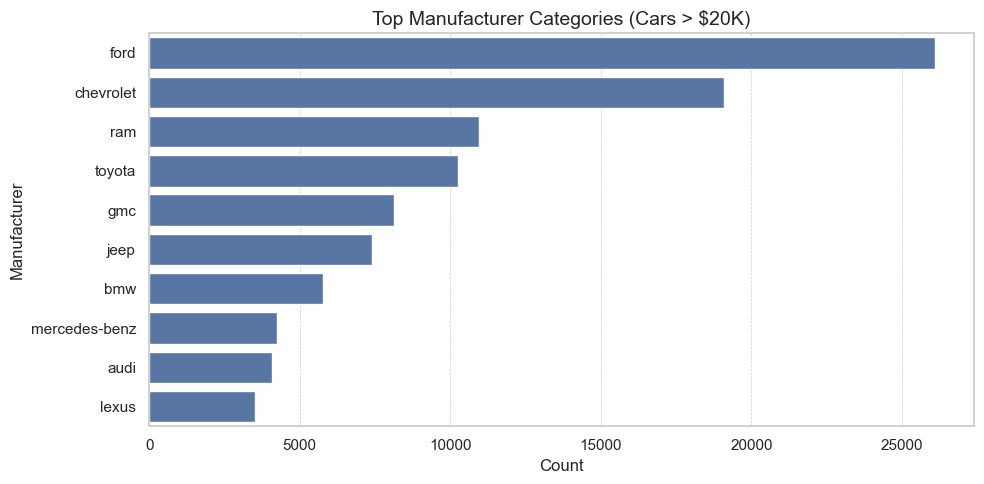

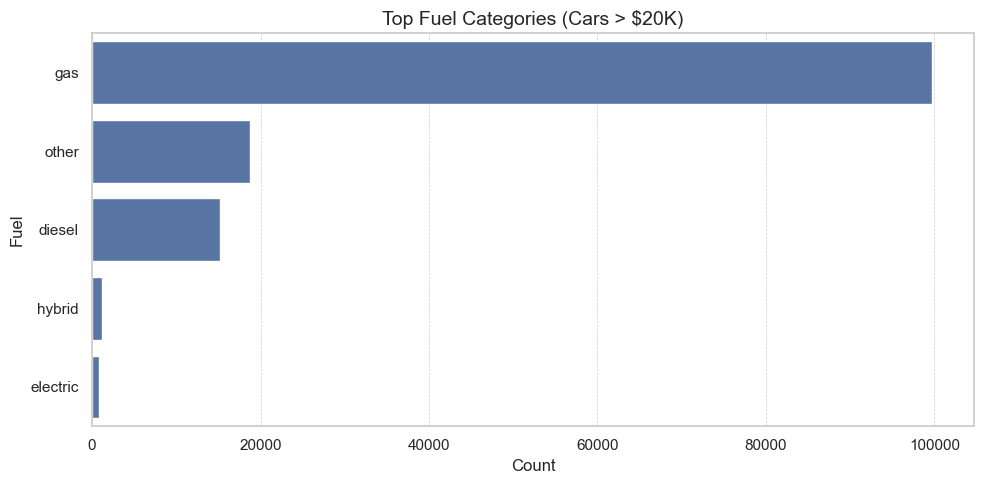

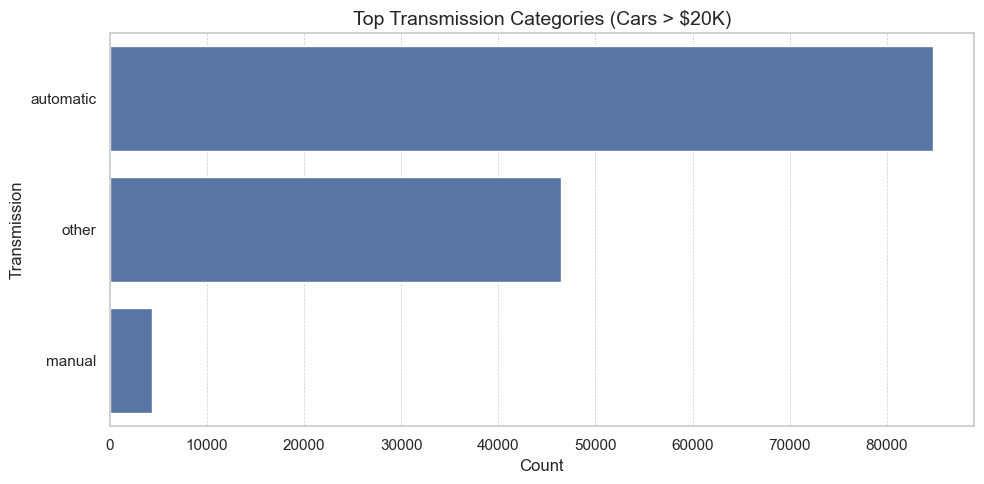

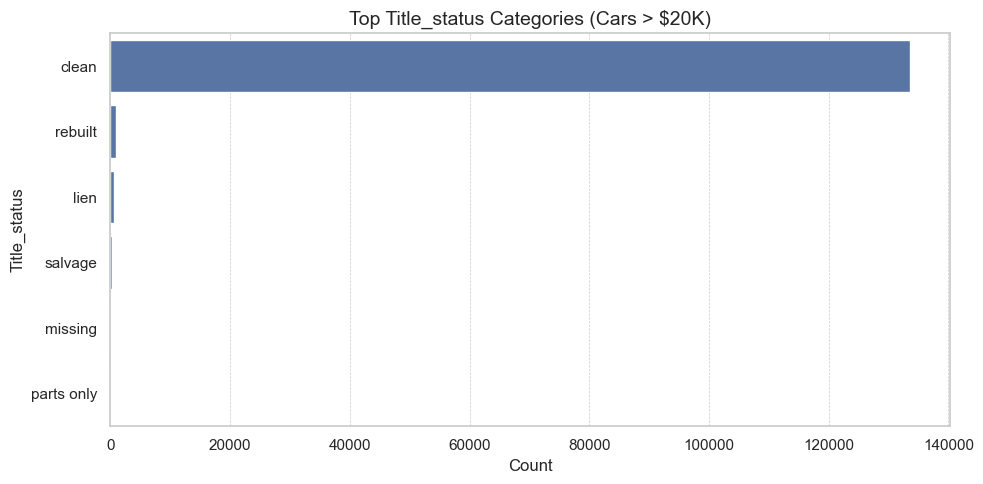

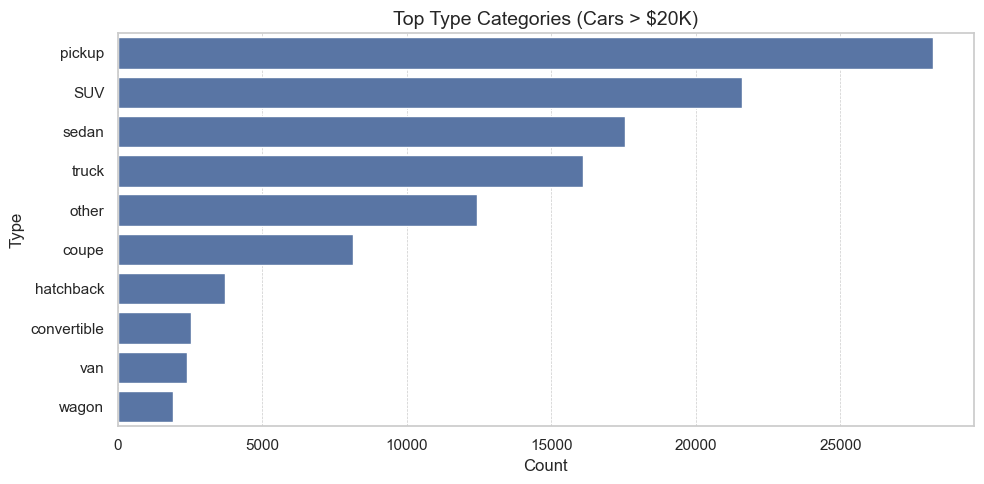

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean visual style
sns.set(style="whitegrid")

# Plot top 10 categories for each column
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    
    # Get top 10 most common categories
    top_categories = high_price_df[col].value_counts().head(10)
    
    # Plot horizontal bar chart
    sns.barplot(
    y=top_categories.index,
    x=top_categories.values
    )
    
    # Titles and labels
    plt.title(f"Top {col.capitalize()} Categories (Cars > $20K)", fontsize=14)
    plt.xlabel("Count")
    plt.ylabel(col.capitalize())
    
    # Add grid and layout
    plt.grid(axis='x', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


### Step 4: Final Insight

Among used cars priced above $20,000, a few clear patterns emerge across categorical traits:

- Ford and Chevrolet are the most common high-priced manufacturers, followed by RAM, Toyota, and GMC—all of which are known for trucks and large vehicles.
- The vast majority of vehicles in this price range use gasoline (≈74%), with diesel trailing behind and only minimal representation from hybrids and EVs. This likely reflects the dominance of gas and diesel cars in the used market, as older listings are more common and electric vehicles are relatively new.
- Automatic transmissions dominate, making up over 60% of listings—while manual cars are rare in this dataset.
- Nearly all vehicles in this price range have a clean title status, suggesting that buyers expect full value only for trustworthy, well-documented vehicles.
- In terms of type, pickups, SUVs, and sedans are the most common body styles, with trucks and coupes also well represented.

These trends suggest that vehicles priced above $20K are most often larger and more utilitarian—fitting the profile of family cars, work trucks, or higher-end daily drivers.

## Question 2: How does car age affect price?

This is a **diagnostic analysis** question because it doesn’t just describe what's happening — it aims to uncover **why** prices change. Specifically, it investigates whether the age of a car helps explain its price depreciation over time.

To answer this question, I’ll use a scatter plot, because it allows us to:

- Visually observe the relationship between two continuous variables (car age and price)
- Identify possible patterns (e.g., linear or non-linear depreciation)
- Detect outliers or clusters

In addition, I’ll calculate the correlation coefficient to:

- Quantify the strength and direction of the relationship
- Support visual findings with statistical evidence

Together, these tools help diagnose whether age is a key driver behind lower car prices — and if so, how strong that effect is.

### Step 1: Create a Car Age Column

#### 1A: Determine the year the dataset was collected

In [25]:
# Convert 'posting_date' column to datetime format so we can extract dates/times correctly
# Setting utc=True handles any timezone differences and avoids future warnings

df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

# Find the most recent posting date in the dataset
# This tells us the latest date a car was listed, which we’ll use as the reference year

latest_post_date = df['posting_date'].max()

# Display the result so we can verify the dataset year
print(f"Latest posting date: {latest_post_date}")

Latest posting date: 2021-05-05 04:24:09+00:00


#### 1B: Calculate Car Age

In [26]:
# Extract the year (2021) from the latest posting date

dataset_year = latest_post_date.year

# Calculate car age by subtracting the car's production year from the dataset year

df['car_age'] = dataset_year - df['year']

# Display the first few values to confirm the new column looks correct

df[['year', 'car_age']].head()

,year,car_age
27,2014.0,7.0
28,2010.0,11.0
29,2020.0,1.0
30,2017.0,4.0
31,2013.0,8.0


### Step 2: Visualize the Relationship Between Car Age and Price

We will use a basic scatter plot for this.

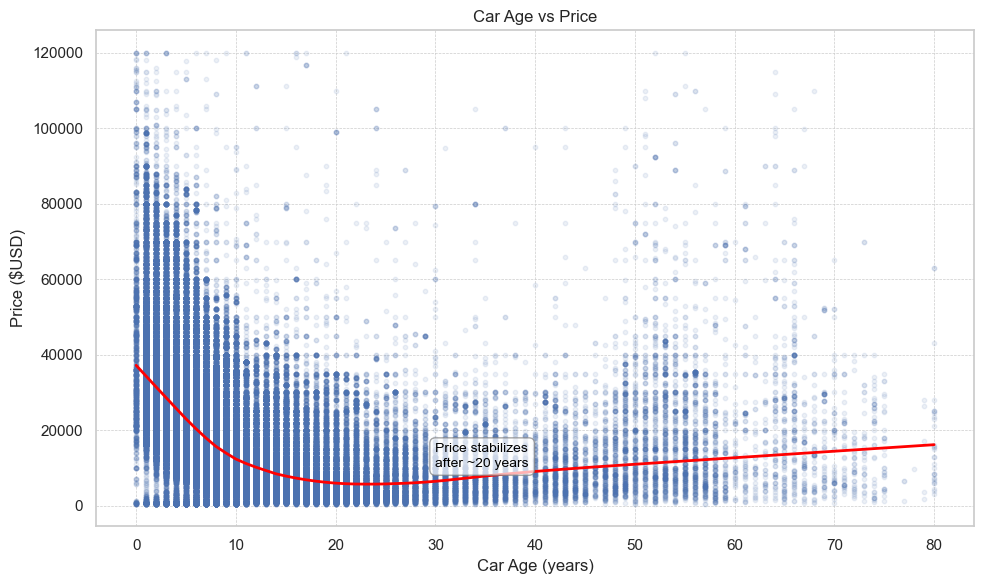

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out extreme outliers and invalid data to improve readability
# - Remove cars with age < 0 (invalid data)
# - Remove cars older than 80 years (likely antiques or data entry errors)
# - Remove listings with price <= 0 (invalid or free postings)

filtered_df = df[(df['car_age'] >= 0) & (df['car_age'] <= 80) & (df['price'] > 0)]

# Set up the figure size for better visibility

plt.figure(figsize=(10, 6))

# Create a scatter plot showing car age (x-axis) vs price (y-axis)
# - Each point represents one car listing
# - Use a small point size and transparency to improve readability in dense areas

sns.regplot(
    data=filtered_df,          # Use the cleaned dataset
    x='car_age',               # X-axis: age of the car
    y='price',                 # Y-axis: price in USD
    scatter_kws={'alpha': 0.1, 's': 10},   # Light, small dots to reduce clutter
    lowess=True,               # Add a LOWESS curve to show the trend
    line_kws={'color': 'red', 'linewidth': 2}  # Style the trend line
)

# Add axis labels and a title to clearly describe the chart

plt.xlabel('Car Age (years)')
plt.ylabel('Price ($USD)')
plt.title('Car Age vs Price')

# Add subtle gridlines to support visual tracking across axes

plt.grid(True, linestyle='--', linewidth=0.5)

# Add a text annotation to highlight where prices stabilize (~20 years)
plt.text(
    30, 13000, 'Price stabilizes\nafter ~20 years',  # Text content and position
    fontsize=10, color='black',                     # Text styling
    ha='left', va='center',                         # Align text to the left horizontally and center vertically
    bbox=dict(                                      # Add a styled box behind the text
        facecolor='white', alpha=0.7,               # White background with slight transparency
        edgecolor='gray', boxstyle='round,pad=0.4'  # Rounded box with padding and gray border
    )
)

# Automatically adjust layout to avoid overlapping labels

plt.tight_layout()

# Display the final plot

plt.show()

### Step 3: Quantify the Relationship (Correlation)

In [28]:
# Pearson correlation ranges from -1 to 1:
#   -1 = perfect negative correlation
#    0 = no correlation
#   +1 = perfect positive correlation

correlation = filtered_df['car_age'].corr(filtered_df['price'])

print(f"Correlation between car age and price: {correlation:.2f}")

Correlation between car age and price: -0.43


### Step 4: Final Insight

The results show a clear negative correlation between a car’s age and its market price. Prices tend to drop most sharply within the first 10 years, then level off — with values stabilizing around the 20-year mark, likely due to collector demand or market floor pricing.

The Pearson correlation coefficient between car age and price is -0.43, reflecting a moderate negative relationship. This shows that car age alone does not fully explain price variation — other factors like mileage, brand, fuel type, and transmission might also contribute significantly.

## Question 3: Which car brands retain their value best over time?

This is both a **descriptive** and **diagnostic** question. Descriptively, it summarizes how different car brands perform in terms of used car value retention. Diagnostically, it helps us explore patterns behind depreciation—why some brands hold value better than others.

To answer this, I will:

1. **Categorize cars into custom age buckets** (e.g., 1–3 years, 4–6, 7–10, 10+), enabling grouped comparison by brand and age.
2. **Group data by brand and age bucket**, then calculate:
   - **Mean price** (for overall trend)
   - **Median price** (to reduce the impact of outliers)
   - **Listing count** (to ensure sufficient data for reliability)
3. **Filter out brand-age combinations with fewer than 50 listings** to avoid skewed averages and maintain statistical trustworthiness.
4. **Visualize depreciation patterns** using:
   - A **heatmap** displaying all brands' mean prices across age groups
   - A **depreciation percentage heatmap** quantifying how much value each brand loses at different stages

These steps will help uncover which brands retain their value best over time, helping both buyers (seeking long-term value) or platforms (trying to recommend listings that hold their worth better over time) identify high-retention vehicles in the used market.

### Step 1: Create Age Buckets



In [29]:
# Define a function to categorize car ages into custom-defined buckets.
# These buckets will help group cars into meaningful age intervals for depreciation analysis.
def age_bucket(age):
    if age <= 3:
        return '1-3'       # Relatively new cars
    elif age <= 6:
        return '4-6'       # Mid-aged cars
    elif age <= 10:
        return '7-10'      # Older cars
    else:
        return '10+'       # Very old cars

# Apply the age_bucket function to the 'car_age' column
# and store the result in a new column called 'age_group'
df['age_group'] = df['car_age'].apply(age_bucket)

### Step 2: Aggregate by Brand and Age Group

Now compute mean price, median price, and listing count per brand per age group:

In [30]:
# Group the dataset by manufacturer and age group, then compute:
# - mean_price: average price for that brand-age group combination
# - median_price: median price to reduce the influence of outliers
# - count: number of listings, which helps filter out low-sample-size groups
agg_df = df.groupby(['manufacturer', 'age_group']).agg(
    mean_price=('price', 'mean'),
    median_price=('price', 'median'),
    count=('price', 'count')
).reset_index()

# Import CategoricalDtype to ensure the age groups are sorted logically (not alphabetically)
from pandas.api.types import CategoricalDtype

# Define a custom order for age groups from youngest to oldest
age_order = CategoricalDtype(['1-3', '4-6', '7-10', '10+'], ordered=True)

# Convert 'age_group' column to an *ordered categorical type* so Python knows the correct sequence (e.g., 1-3 < 4-6 < 7-10 < 10+)
# This is essential for proper sorting in plots and group comparisons
df['age_group'] = df['age_group'].astype(age_order)
agg_df['age_group'] = agg_df['age_group'].astype(age_order)

### Step 3: Filter for Reliability

To make sure our analysis is based on **statistically meaningful data**, we filter out any brand-age group combinations that have **fewer than 50 listings**.

Low sample sizes can lead to **skewed averages** that don’t reflect the true trend — for example, one unusually cheap or expensive car could dramatically affect the mean and median. By setting a minimum threshold (like 50), we improve the **reliability and trustworthiness** of our results.

In [31]:
# Filter out brand-age groups with fewer than 50 listings
# This helps avoid unreliable averages/medians caused by small sample sizes (outliers would skew the results)
agg_df = agg_df[agg_df['count'] >= 50]

### Step 4: Visualize Price Retention

#### A. Heatmap: Mean Price by Brand and Age Group

While the line plot focused on the top 6 brands for clarity, this heatmap gives a **full overview of all brands** and how their average price changes across age groups.

Each cell shows the **mean used car price** for a specific brand and age group.

This format makes it easy to:

- Spot which brands **retain higher prices** even as they age (look for rows with less price drop left-to-right)
- Compare value retention patterns across the entire brand list
- Identify outliers or brands with unusual depreciation trends


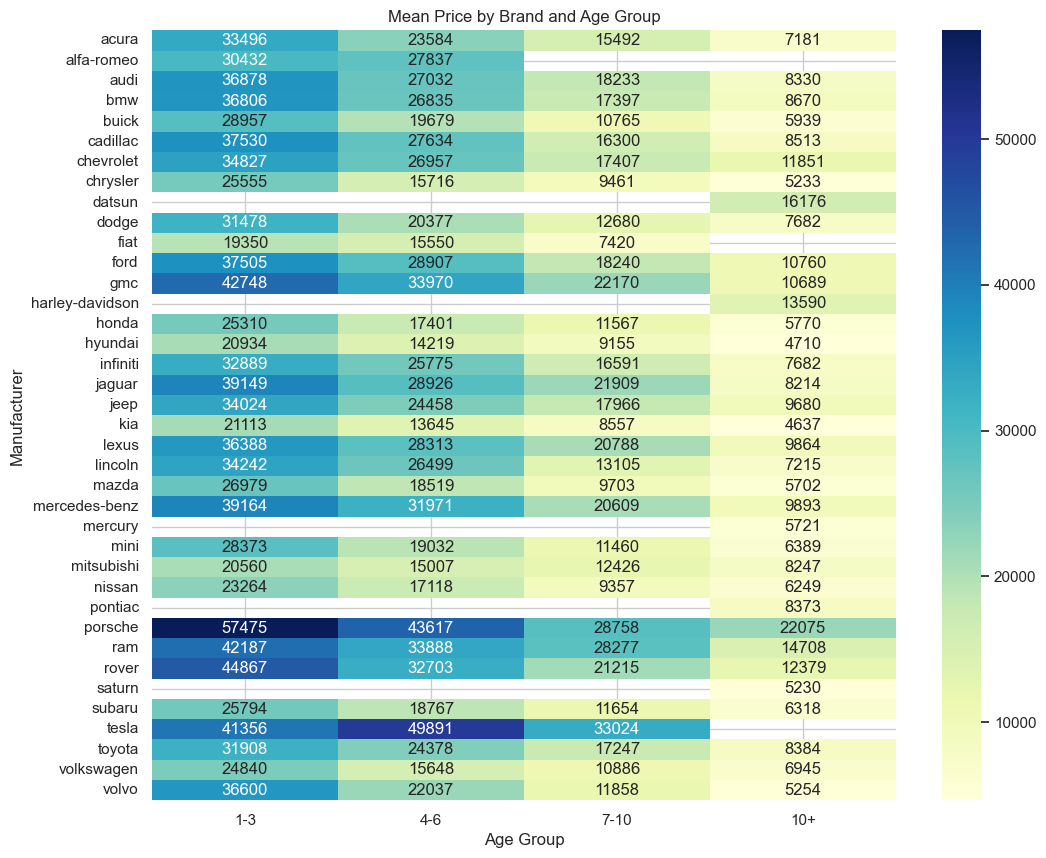

In [32]:
# Pivot the aggregated data so that:
# - Rows are car manufacturers
# - Columns are car age groups (1–3, 4–6, etc.)
# - Values are the mean prices
# This structure is needed to feed the heatmap
heatmap_data = agg_df.pivot(index='manufacturer', columns='age_group', values='mean_price')

# Set the figure size for better readability
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize mean prices across age groups for each brand
sns.heatmap(
    heatmap_data,
    annot=True,        # Display the values in each cell
    fmt=".0f",         # Format values as whole numbers (no decimals)
    cmap="YlGnBu"      # Use a yellow-green-blue gradient color scheme
)

# Add title and axis labels for clarity
plt.title('Mean Price by Brand and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Manufacturer')

# Show the plot
plt.show()

#### B. Heatmap: Depreciation Rate by Age Group and Total %

While the earlier heatmap showed absolute price trends, this visualization focuses on **percentage depreciation** between age groups. It calculates the drop in average price from:

- 1–3 years to 4–6 years  
- 4–6 years to 7–10 years  
- 7–10 years to 10+ years  
- And the **total depreciation** from 1–3 years to the latest available age group

This gives a clearer picture of **how steeply each brand loses value** over time, regardless of their original price level. By comparing percentage drops, we can identify:

- Brands that **hold value steadily** across years  
- Brands that **plummet sharply** at specific age transitions  
- Total value loss over time, helping highlight long-term value retention

The heatmap below provides a quick visual comparison of these depreciation percentages across all brands.


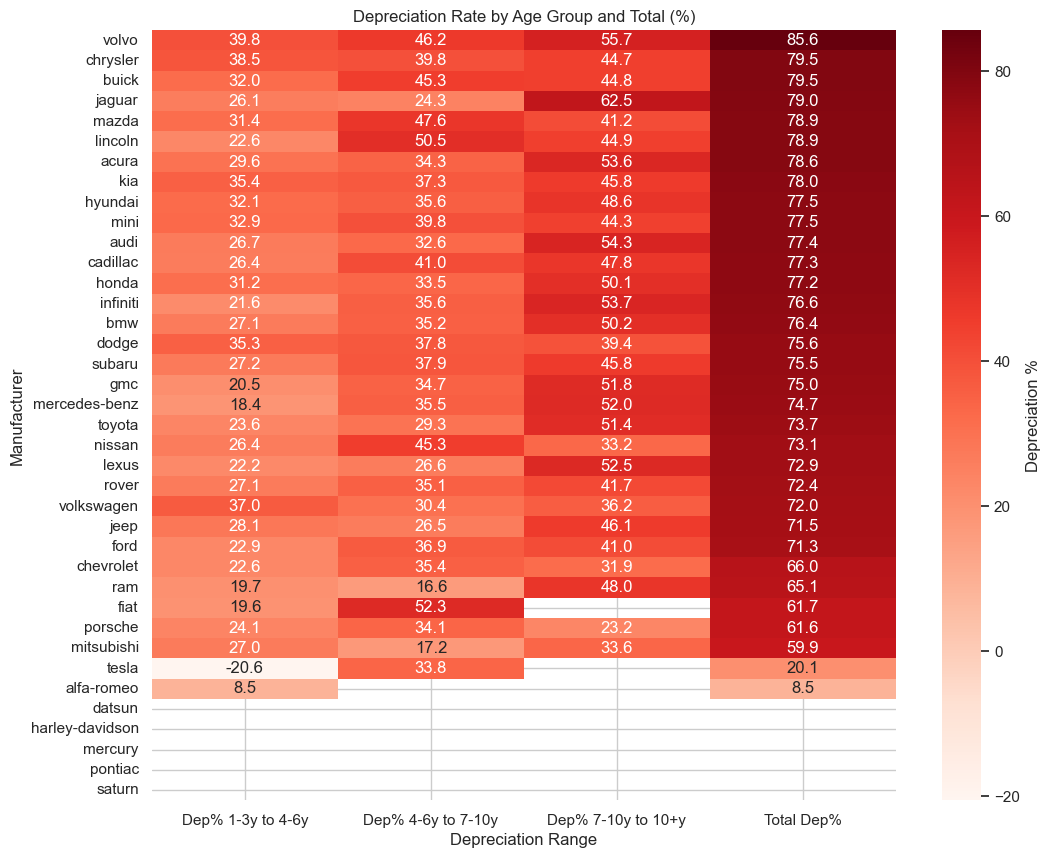

In [33]:
# Copy the heatmap data to avoid modifying it directly
depreciation_data = heatmap_data.copy()

# Calculate depreciation % between each age group
depreciation_data['Dep% 1-3y to 4-6y'] = ((heatmap_data['1-3'] - heatmap_data['4-6']) / heatmap_data['1-3']) * 100
depreciation_data['Dep% 4-6y to 7-10y'] = ((heatmap_data['4-6'] - heatmap_data['7-10']) / heatmap_data['4-6']) * 100
depreciation_data['Dep% 7-10y to 10+y'] = ((heatmap_data['7-10'] - heatmap_data['10+']) / heatmap_data['7-10']) * 100

# Calculate Total Dep% from 1-3 years to the latest available age group (10+, 7-10, or 4-6)
def calculate_total_dep(row):
    start = row['1-3']
    if not pd.isna(row['10+']):
        end = row['10+']
    elif not pd.isna(row['7-10']):
        end = row['7-10']
    elif not pd.isna(row['4-6']):
        end = row['4-6']
    else:
        return None
    return ((start - end) / start) * 100

depreciation_data['Total Dep%'] = depreciation_data.apply(calculate_total_dep, axis=1)

# Select only the depreciation columns
depreciation_summary = depreciation_data[[
    'Dep% 1-3y to 4-6y',
    'Dep% 4-6y to 7-10y',
    'Dep% 7-10y to 10+y',
    'Total Dep%'
]]

# Format and sort for visualization
depreciation_summary_formatted = depreciation_summary.round(1).sort_values(by='Total Dep%', ascending=False)

# Plot the depreciation summary as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    depreciation_summary_formatted,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    cbar_kws={'label': 'Depreciation %'}
)
plt.title('Depreciation Rate by Age Group and Total (%)')
plt.ylabel('Manufacturer')
plt.xlabel('Depreciation Range')
plt.show()


### Step 5: Final Insight: Which Car Brands Retain Their Value Best Over Time?

To determine which car brands retain their value most effectively, I analyzed the average depreciation rates, per manufacturer, across four vehicle age groups: **1–3 years, 4–6 years, 7–10 years, and 10+ years**. The key metric used was **total depreciation %**, calculated from the difference between the average resale value in the 1–3 year age group and the oldest age group (for most manufacturers: 10+ years).

This analysis shows which brands **retain the highest percentage of their original value over time**.

---

#### Final Answer:
Based on the **lowest total depreciation percentages**, the **top 3 car brands that best retain their value over time** are:

1. **Tesla** – Retains **79.9%** of its original value over time (**20.1% total depreciation**). Uniquely, Tesla shows **appreciation** in the early years (as seen by a negative depreciation rate from 1–3y to 4–6y), likely driven by high demand and limited supply.

2. **Mitsubishi** – Retains **40.1%** of its value (**59.9% depreciation**), making it the strongest internal combustion engine (ICE) performer in this dataset in terms of pure value retention.

3. **Porsche** – Retains **38.4%** of its value (**61.6% depreciation**), outperforming other luxury and mass-market brands in long-term value holding.

---

#### Why Not Alfa Romeo?

Although Alfa Romeo shows the lowest single depreciation rate (8.5%) in the 1–3y to 4–6y range, it was excluded from the top performers because it only has data for that first range, with no values for later years (e.g., 4–6y to 7–10y or 10+). This makes it unreliable for calculating total depreciation or comparing it fairly with other manufacturers.

---

#### Additional Notes:

- Brands like **Fiat**, **Ram**, **Chevrolet**, and **Ford** also show strong long-term retention (total depreciation between **61% and 71%**) but fell just outside the top 3.
- This ranking is based solely on **percentage-based value retention**, not resale price or market popularity.
  - Tesla scores high both in terms of % retention **and** resale value.
  - Mitsubishi shows strong retention **despite being a budget brand**.
  - Porsche demonstrates premium brand strength in value preservation.

## Question 4: How does fuel type and transmission affect car price?

This is a **diagnostic analysis** question, as it explores how categorical vehicle features—fuel type and transmission—help explain price differences across listings.

To answer this, I will use the following visualizations:

- Box plots (these visualizations help reveal medians, variability, and outliers across each category) to compare the distribution of prices across:
  - Different fuel types (e.g., gas, diesel, electric)
  - Transmission types (e.g., automatic vs. manual)
- A grouped bar chart showing the median price by fuel type and transmission combination, to uncover whether certain pairings (like automatic hybrids or manual diesels) consistently command higher or lower prices.

These tools make it easier to diagnose whether pricing patterns exist between different engine and transmission types—and if those features could be important pricing drivers in the used car market.

### Step 1: Explore the Variables

Check the distribution of `fuel` and `transmission` types before filtering.

In [34]:
print(df['fuel'].value_counts())
print(df['transmission'].value_counts())

fuel
gas         295058
other        25680
diesel       20709
hybrid        4411
electric      1447
Name: count, dtype: int64
transmission
automatic    270433
other         57884
manual        18988
Name: count, dtype: int64


### Step 2: Filter for Clean Categories

To keep only the most relevant and interpretable options, I will drop vague entries like `"other"`.

In [35]:
# Keep only rows with common, interpretable values
filtered_df = df[
    (df['fuel'].isin(['gas', 'diesel', 'hybrid', 'electric'])) &
    (df['transmission'].isin(['automatic', 'manual']))
]

# Show the cleaned category counts after filtering
print(filtered_df['fuel'].value_counts())
print(filtered_df['transmission'].value_counts())

fuel
gas         256268
diesel       19948
hybrid        3497
electric       657
Name: count, dtype: int64
transmission
automatic    261563
manual        18807
Name: count, dtype: int64


### Step 3: Visualize the Relationship Between Fuel Type, Transmission, and Price

#### 3A. Boxplot: Fuel Type vs Price

This shows price distribution per fuel type (spread, outliers, medians):

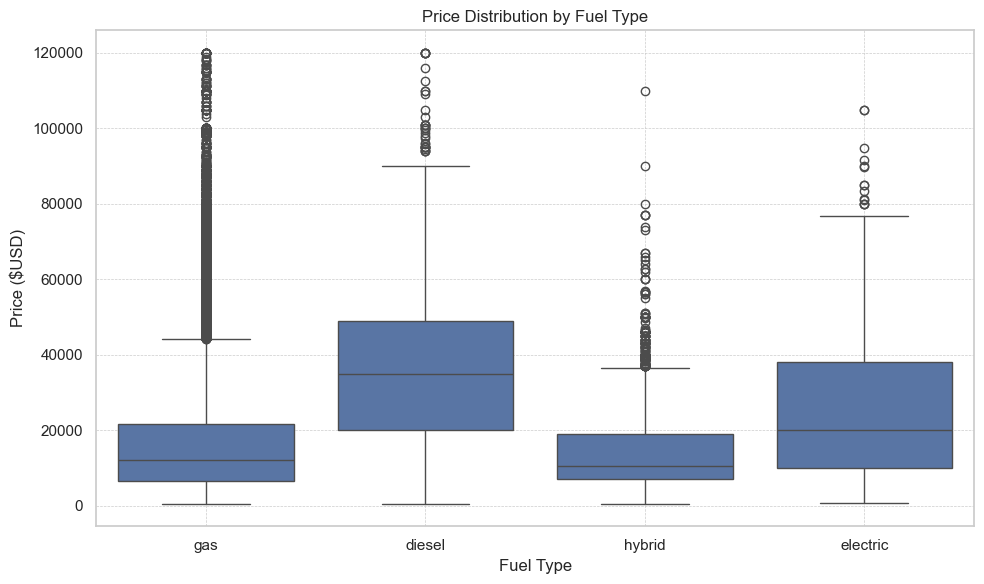

In [36]:
# Set the overall figure size for the plot
plt.figure(figsize=(10, 6))

# Create a boxplot to show price distribution across different fuel types
sns.boxplot(data=filtered_df, x='fuel', y='price')

# Add a descriptive title to the plot
plt.title('Price Distribution by Fuel Type')

# Label the x-axis (fuel categories)
plt.xlabel('Fuel Type')

# Label the y-axis (used car prices)
plt.ylabel('Price ($USD)')

# Add gridlines for easier reading across axes
plt.grid(True, linestyle='--', linewidth=0.5)

# Automatically adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the final plot
plt.show()

#### Price Distribution by Fuel Type – Box Plot Interpretation

From the first box plot, we observe distinct price patterns across different fuel types, based on their median prices, interquartile ranges (IQRs), and the presence of outliers:

1. **Diesel Vehicles**

- Diesel vehicles show the highest median price among all fuel types.
- They also have a wide interquartile range, suggesting a broad distribution of prices.
- This could be due to the presence of commercial or heavy-duty models, which tend to be more expensive. Diesel engines are also often associated with better fuel economy and durability, potentially contributing to higher resale values. However, this remains an assumption.

2. **Electric Vehicles (EVs)**

- EVs have a high median price, higher than gas and hybrids, but lower than diesel.
- Their wide IQR, which spans from 10,000 to almost 40,000, indicates a large variability in pricing—likely reflecting a mix of budget-friendly  models and premium vehicles in the dataset.

3. **Gas Vehicles**

- Gas vehicles have a median price slightly above hybrids, but lower than electric and diesel cars.
- They show a very large number of upper outliers. May be due to a wide range of models—from older economy cars to some high-end listings.

4. **Hybrid Vehicles**

- Hybrid vehicles have the lowest median price and their interquartile range is relatively narrow.
- This indicates that most hybrid listings fall within a consistent and lower price bracket.
- This is possibly due to older or mid-tier models designed with efficiency and practicality in mind, rather than luxury.

#### 3B. Boxplot: Transmission Type vs Price

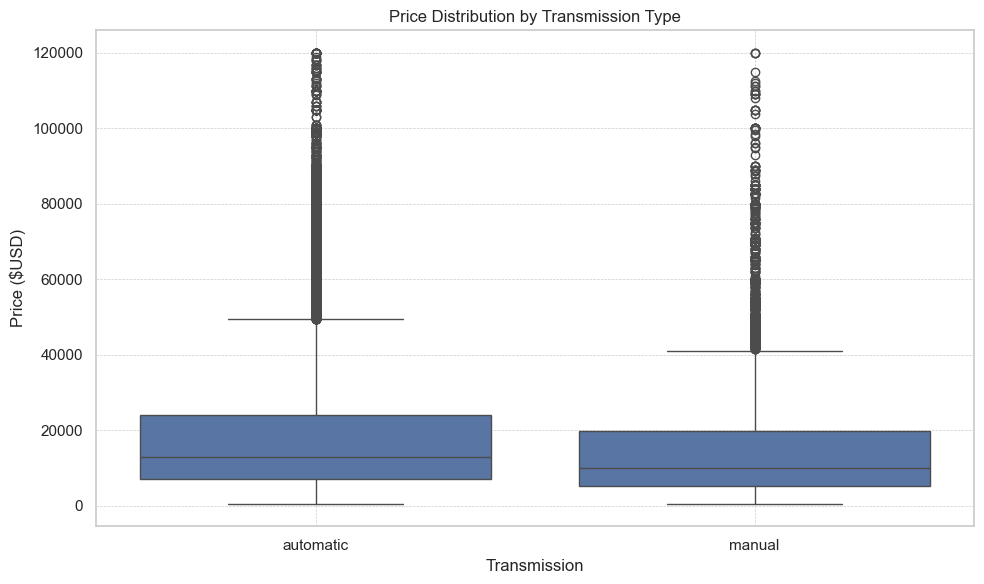

In [37]:
# Set the overall size of the figure
plt.figure(figsize=(10, 6))

# Create a boxplot to show how price varies by transmission type
sns.boxplot(data=filtered_df, x='transmission', y='price')

# Add a title to clearly describe the plot
plt.title('Price Distribution by Transmission Type')

# Label the x-axis (transmission types: automatic vs manual)
plt.xlabel('Transmission')

# Label the y-axis (used car prices in USD)
plt.ylabel('Price ($USD)')

# Add light dashed gridlines to make the plot easier to read
plt.grid(True, linestyle='--', linewidth=0.5)

# Adjust spacing so labels and titles fit cleanly
plt.tight_layout()

# Show the final plot
plt.show()

#### Price Distribution by Transmission Type – Box Plot Interpretation

The second box plot reveals that automatic vehicles generally command higher median prices than manual ones. This may be due to higher demand for automatics in the U.S. market, where convenience tends to be prioritized. Additionally, the spread is wider for automatic transmissions, suggesting a broader price range and more premium models falling into this category. Manual cars, while potentially cheaper to maintain, appear to cluster at the lower end of the price spectrum, possibly due to reduced demand or older inventory.

#### 3C. Grouped Bar Chart: Median Price by Fuel + Transmission

**Why median price?**

Used car prices have a wide range, and some listings are extreme outliers (e.g., rare luxury models or extremely cheap vehicles). 

Using the **median** instead of the **mean** helps avoid skewed results and gives a more accurate picture of what buyers typically pay. Medians are more robust for comparing pricing patterns across fuel and transmission combinations — especially when the data is not normally distributed.

Let’s see how the combination affects price:

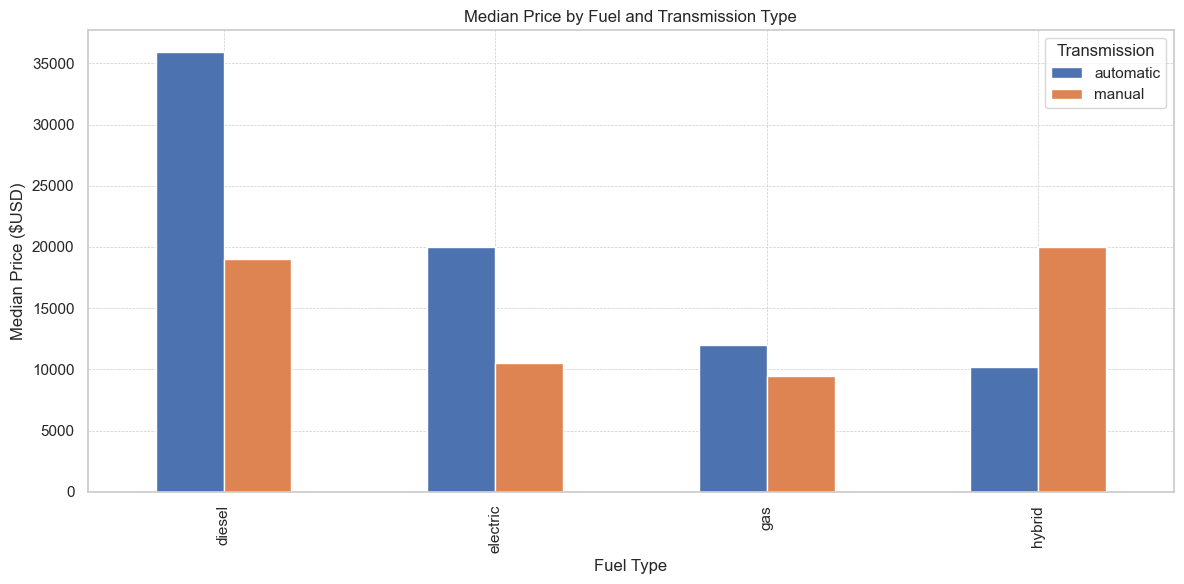

In [38]:
# Group the data by fuel and transmission, then calculate the median price for each combination
grouped = filtered_df.groupby(['fuel', 'transmission'])['price'].median().unstack()

# Create a grouped bar chart from the aggregated data
grouped.plot(kind='bar', figsize=(12, 6))

# Add a clear, descriptive title to the chart
plt.title('Median Price by Fuel and Transmission Type')

# Label the y-axis to indicate the values being measured (median price)
plt.ylabel('Median Price ($USD)')

# Label the x-axis to show the fuel type categories
plt.xlabel('Fuel Type')

# Add a legend to distinguish between transmission types in the bars
plt.legend(title='Transmission')

# Add light dashed gridlines to improve visual readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Adjust layout to prevent clipping of labels or titles
plt.tight_layout()

# Display the plot
plt.show()

##### 🔍 **Investigating the Hybrid + Manual Outlier**

To better understand the unexpectedly high median price for hybrid manual vehicles, we looked at the distribution of listings in that category — to see if the sample size was small (which could skew the median):

In [39]:
# Check how many hybrid+manual vehicles exist
filtered_df[
    (filtered_df['fuel'] == 'hybrid') &
    (filtered_df['transmission'] == 'manual')
].shape[0]

124

In [40]:
# Preview the highest-priced hybrid+manual listings  
# We're not just checking how high the prices go — we're checking if the top values are clustered at the same repeated price as the median.  
# A high median isn't caused by extreme outliers, but by many listings sharing a similar value (e.g. $19,990 appearing frequently)

filtered_df[
    (filtered_df['fuel'] == 'hybrid') &
    (filtered_df['transmission'] == 'manual')
][['manufacturer', 'model', 'price']].sort_values(by='price', ascending=False).head(10)

,manufacturer,model,price
323,hyundai,sonata plug-in hybrid,19990
269876,hyundai,sonata plug-in hybrid,19990
298203,hyundai,sonata plug-in hybrid,19990
295520,hyundai,sonata plug-in hybrid,19990
292320,hyundai,sonata plug-in hybrid,19990
289495,hyundai,sonata plug-in hybrid,19990
286445,hyundai,sonata plug-in hybrid,19990
283418,hyundai,sonata plug-in hybrid,19990
280498,hyundai,sonata plug-in hybrid,19990
278350,hyundai,sonata plug-in hybrid,19990


### Step 4: Final Insight

The combination of fuel type and transmission clearly influences used car pricing:

- Diesel automatics show the highest median prices, likely due to their presence in trucks, heavy-duty pickups, and commercial vehicles, which tend to be significantly more expensive than typical sedans or compacts.
- Electric automatics also rank high in price, reflecting the newer nature of most EVs and their automatic-only designs.
- Across different fuel types, manual transmission vehicles are generally associated with lower median prices — likely reflecting reduced market demand or older vehicle models.
- An exception appears in hybrid-manual vehicles, which show a surprisingly high median price. However, after deeper analysis I found that this is largely driven by a cluster of Hyundai Sonata Plug-in Hybrid listings, many of which are priced exactly at $19,990. This price point appears repeatedly across the dataset — including among the most expensive listings — suggesting a concentrated pattern that raises the median — not because of extreme values, but due to the high frequency of that price point within the dataset.

This analysis reinforces the importance of examining categorical combinations carefully, and shows that both fuel and transmission types significantly influence used car prices within the market.

## Question 5: What factors most influence the price of a used car (based on the available data)?

This question is **diagnostic** because it investigates **which factors are driving differences** in used car prices based on the available data. It is also **predictive** because it involves building a machine learning model to estimate prices, which could be used to make future predictions based on feature inputs.


### Step-by-Step Approach:


#### 1. Review Available Features

- Make sure that the dataset includes only the relevant features for this analysis.
- Remove potential redundancy (for example the column 'year' when we already calculated 'car_age')
- Consider dropping or consolidating overlapping columns.

---

#### 2. Explore Relationships with Price

##### Univariate Analysis

- Examine the distribution of `price` to assess skewness and outliers.
- Identify appropriate transformations if needed (e.g., log transformation).

##### Bivariate Analysis

- Use scatterplots to explore numeric relationships (e.g., `car_age` vs. `price`, `odometer` vs. `price`).
- Generate a correlation matrix for numeric features.
- Use boxplots to explore how `price` varies by categorical variables like `fuel`, `transmission`, `manufacturer`, and `type`.

---

#### 3. Encode Categorical Variables

- Apply one-hot encoding to convert categorical features such as `fuel`, `transmission`, `title_status`, `type`, `manufacturer`, and `state` into numerical format so that the machine learning model can understand it. 

---

#### 4. Model Feature Importance

- Use a predictive model (Random Forest) to estimate which features are most influential in determining car price.
- Train the model and extract feature importances for interpretation.
- Visualize the top features affecting price to draw conclusions.

---

#### 5. Insights from Feature Importance

- Summarize the end results into a final insight to answer the question asked. 

---

### Step 1: Review Available Features

#### 1. Make a Copy of the Original DataFrame
We start with a copy so you can safely experiment:

In [41]:
df_price_analysis = df.copy()

#### 2. Drop Irrelevant Columns
These columns don't contribute to predicting the price:

- id → purely an ID
- description → unstructured text (skip)
- posting_date → you've already created car_age
- lat and long → only useful if you include location in clustering or visualizations

In [42]:
df_price_analysis = df_price_analysis.drop(['id', 'description', 'posting_date'], axis=1)
df_price_analysis = df_price_analysis.drop(['lat', 'long'], axis=1)


#### 3. Replace year with car_age
Since car_age is clearer and already calculated, you can remove year:

In [43]:
df_price_analysis = df_price_analysis.drop('year', axis=1)


#### 4. Rearrange the Columns
For clarity in analysis and visualizations:

In [44]:
df_price_analysis = df_price_analysis[['price', 'car_age', 'manufacturer', 'model', 'fuel',
                                       'odometer', 'title_status', 'transmission', 'type',
                                       'region', 'state']]


#### 5. Check Column Types
Make sure that numerical and categorical columns are correctly typed:

- price, car_age, odometer → numerical
- manufacturer, fuel, transmission, etc. → categorical

In [45]:
df_price_analysis.info()


<class 'pandas.core.frame.DataFrame'>
Index: 347305 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         347305 non-null  int64  
 1   car_age       347305 non-null  float64
 2   manufacturer  347305 non-null  object 
 3   model         347305 non-null  object 
 4   fuel          347305 non-null  object 
 5   odometer      347305 non-null  float64
 6   title_status  347305 non-null  object 
 7   transmission  347305 non-null  object 
 8   type          273456 non-null  object 
 9   region        347305 non-null  object 
 10  state         347305 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 31.8+ MB


### Step 2: Explore Relationships with Price


#### 1. Univariate Analysis: Understand the Distribution of price

Here I check for skewness, outliers, and see if log transformation is needed.

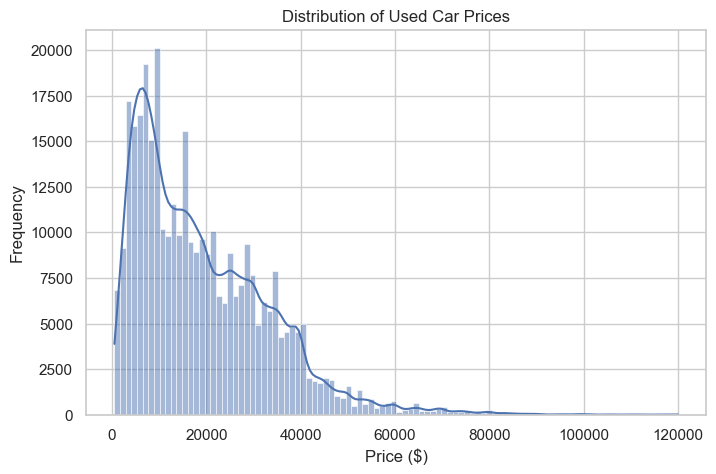

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_price_analysis['price'], bins=100, kde=True)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


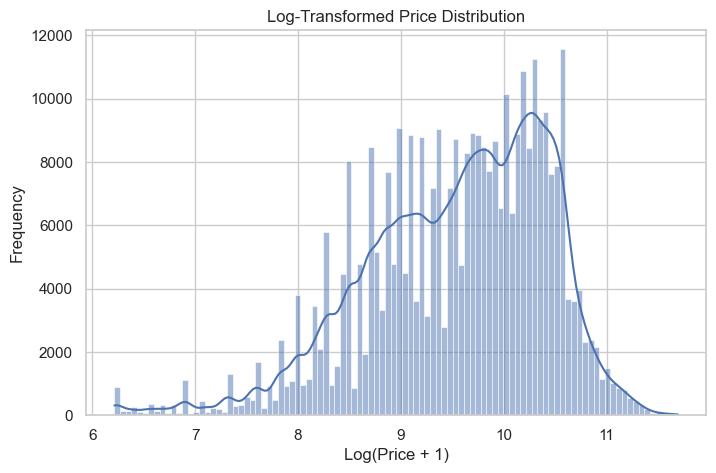

In [47]:
import numpy as np

plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df_price_analysis['price']), bins=100, kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()


#### 2. Bivariate Analysis: Price vs. Numeric Features

##### A. 📉 car_age vs. price

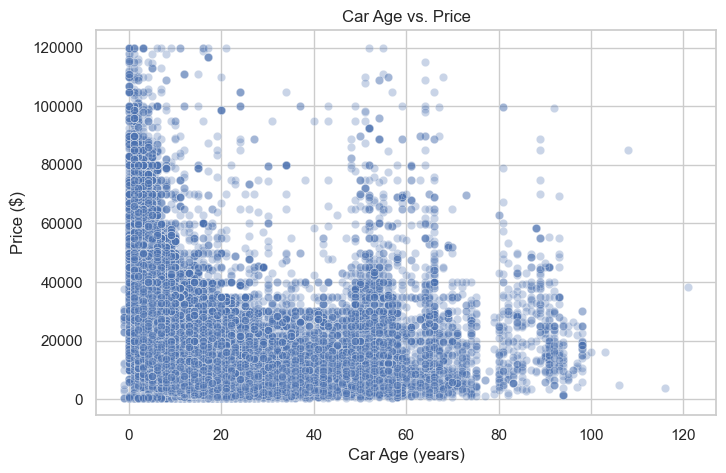

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='car_age', y='price', data=df_price_analysis, alpha=0.3)
plt.title('Car Age vs. Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Price ($)')
plt.show()


##### B. 📉 odometer vs. price

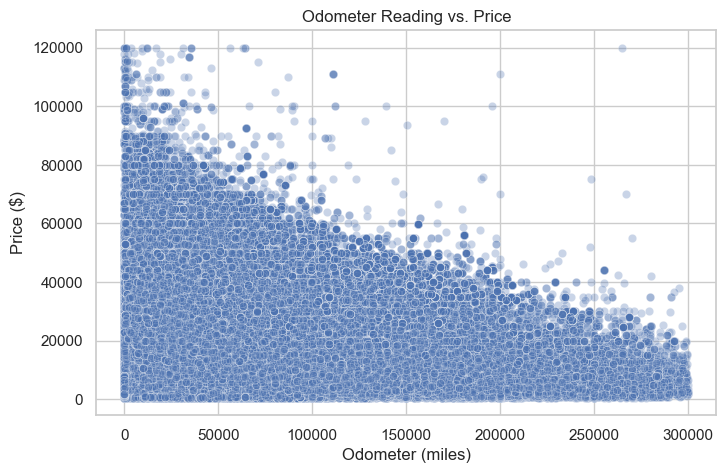

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='odometer', y='price', data=df_price_analysis, alpha=0.3)
plt.title('Odometer Reading vs. Price')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.show()


##### C. 🧮 Correlation Matrix (numeric-only)


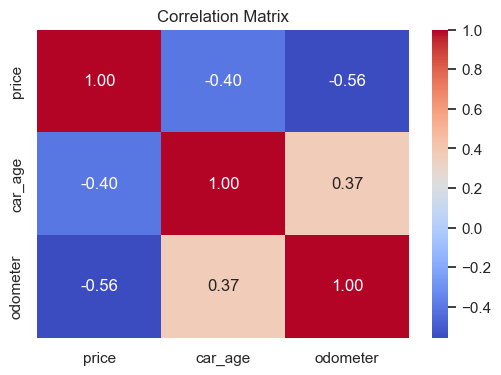

In [50]:
numeric_features = df_price_analysis[['price', 'car_age', 'odometer']]
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### 3. Price vs. Categorical Features
Boxplots are perfect here. Let’s do a few:

##### A. fuel

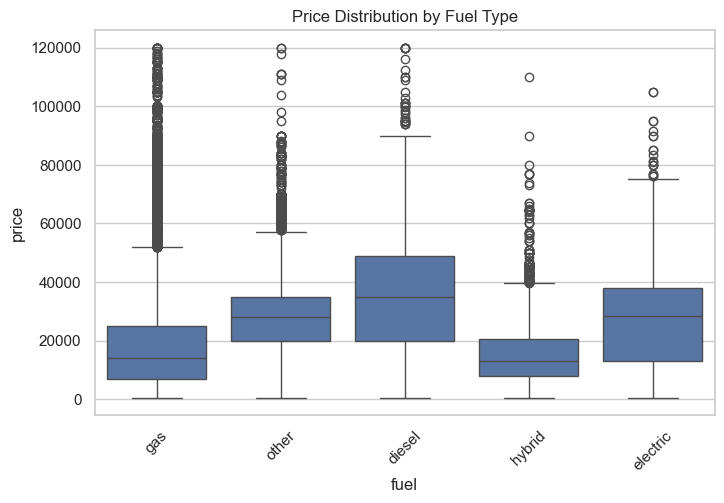

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='price', data=df_price_analysis)
plt.title('Price Distribution by Fuel Type')
plt.xticks(rotation=45)
plt.show()


##### B. transmission


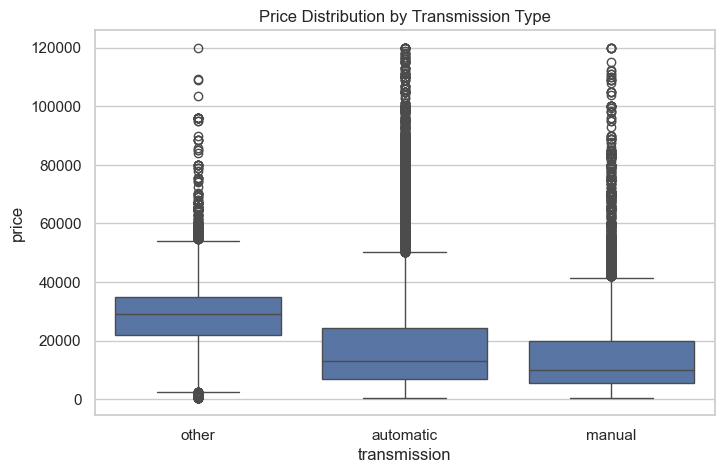

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='price', data=df_price_analysis)
plt.title('Price Distribution by Transmission Type')
plt.show()


##### C. manufacturer (Top 10 most frequent)


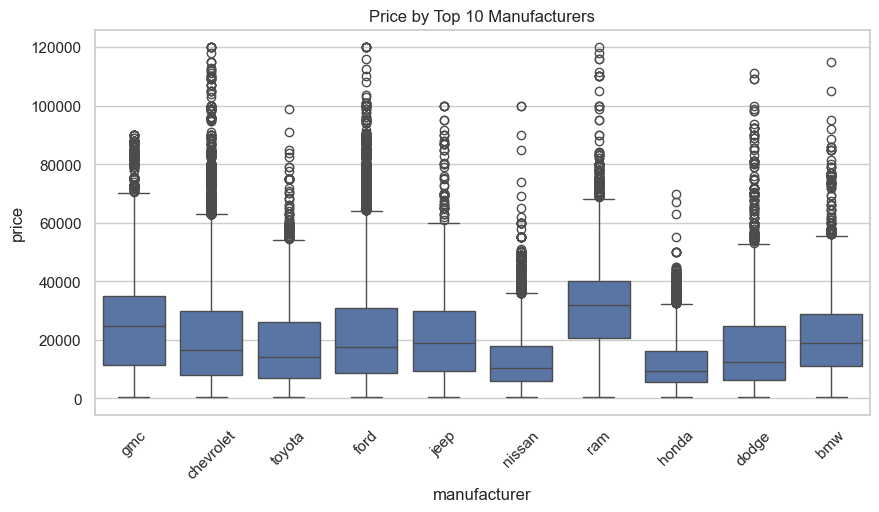

In [53]:
top_10 = df_price_analysis['manufacturer'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 5))
sns.boxplot(x='manufacturer', y='price', data=df_price_analysis[df_price_analysis['manufacturer'].isin(top_10)])
plt.title('Price by Top 10 Manufacturers')
plt.xticks(rotation=45)
plt.show()


#### Insights


##### Univariate Analysis

- The `price` distribution is **heavily right-skewed**, with most cars priced under $20,000.
- A **log transformation** (`log_price = log(price + 1)`) produces a much more normalized distribution, which is better suited for modeling.

---

##### Bivariate Analysis (Numeric Features)

###### Car Age vs. Price

- Strong negative trend: **older cars tend to be cheaper**.
- The price drops rapidly in the first 10–20 years of age, then levels off. There are some higher-priced cars from the age of 50+ which indicates collector cars or antique cars.

###### Odometer vs. Price

- Also a clear negative relationship: **cars with higher mileage are less expensive**.
- This relationship appears more linear compared to car age.

###### Correlation Matrix

- `price` is:
  - **-0.40** correlated with `car_age`
  - **-0.56** correlated with `odometer`
- Suggests mileage is slightly more predictive than age, though both are strong indicators of value.

---

##### Bivariate Analysis (Categorical Features)

###### Fuel Type

- **Electric and diesel** cars shows higher median prices.
- **Gas and hybrid** cars shows lower median prices.

###### Transmission Type

- It appears that **manual** is slightly cheaper than **automatic**.

###### Manufacturer (Top 10 by Frequency)

- **BMW**, **Ram**, **Jeep** and **GMC** lean toward higher prices.
- **Ford**, **Chevrolet**, and **Toyota** sit around the median.
- **GMC** shows a wide price range — likely due to different truck models and trims.

---

##### Key Insights:

- **Age** and **mileage** are definately strong numeric predictors of price, both negatively correlated.
- **Fuel type** and **manufacturer** significantly influence value. Transmission type not so much since manual & automatic are relatively close to each other and the category "other" is too vague too gain any insights from that.

### Step 3: Encode Categorical Variables

We are now going to turn all non-numeric variables into numeric ones so I can use them in modeling (e.g., Random Forest). I'll use one-hot encoding for that.

The columns to encode are the object-type (categorical) columns in df_price_analysis:

- 'manufacturer'
- 'model'
- 'fuel'
- 'title_status'
- 'transmission'
- 'type'
- 'region'
- 'state'

But to keep it clean for feature importance analysis, you can start by encoding the most relevant ones:

In [54]:
categorical_cols = ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']

We can skip model and region for now:

- 'model' is high-cardinality (too many unique values — may introduce noise)
- 'region' is often redundant with state

#### 1. Apply One-Hot Encoding

In [55]:
df_encoded = pd.get_dummies(df_price_analysis, columns=categorical_cols, drop_first=False)

Now we have a clean DataFrame with all features in numeric format, so the machine learning model we are going to train will be able to understand the data.

#### 2. Check The New DataFrame

In [56]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347305 entries, 27 to 426879
Columns: 124 entries, price to state_wy
dtypes: bool(119), float64(2), int64(1), object(2)
memory usage: 55.3+ MB


### Step 4: Model Feature Importance

We’ll now train a Random Forest Regressor to find out which features influence price the most (including both numerical and categorical). While Random Forest is primarily a predictive model, its built-in feature importance attribute makes it highly useful for identifying the features that most influence used car prices. 

#### Step 1: Define Features (X) and Target (y)
We’ll use log_price as the target since it’s better distributed:

In [57]:
df_encoded['log_price'] = np.log1p(df_encoded['price'])

# Import required modules for data splitting, model training, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop raw price
# Drop high-cardinality categorical features to speed up modeling
cols_to_drop = ['model', 'region']

# Create the feature matrix X by dropping the target and unnecessary columns
X = df_encoded.drop(['log_price', 'price'] + cols_to_drop, axis=1)

# Define the target variable y as the log-transformed price
y = df_encoded['log_price']

# Display concise summary of the DataFrame, including column names and data types
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347305 entries, 27 to 426879
Columns: 125 entries, price to log_price
dtypes: bool(119), float64(3), int64(1), object(2)
memory usage: 58.0+ MB


#### Step 2: Model Training & Evaluation

In [58]:
# Split the data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor with 50 trees and a fixed random state for consistency
model = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) to measure prediction error in the same units as the target
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R²) to evaluate how well the model explains the variance in the target variable
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics with two decimal places
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 0.39
R²: 0.81


C:\Users\sbuwa\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Step 3: Visualize Feature Importances

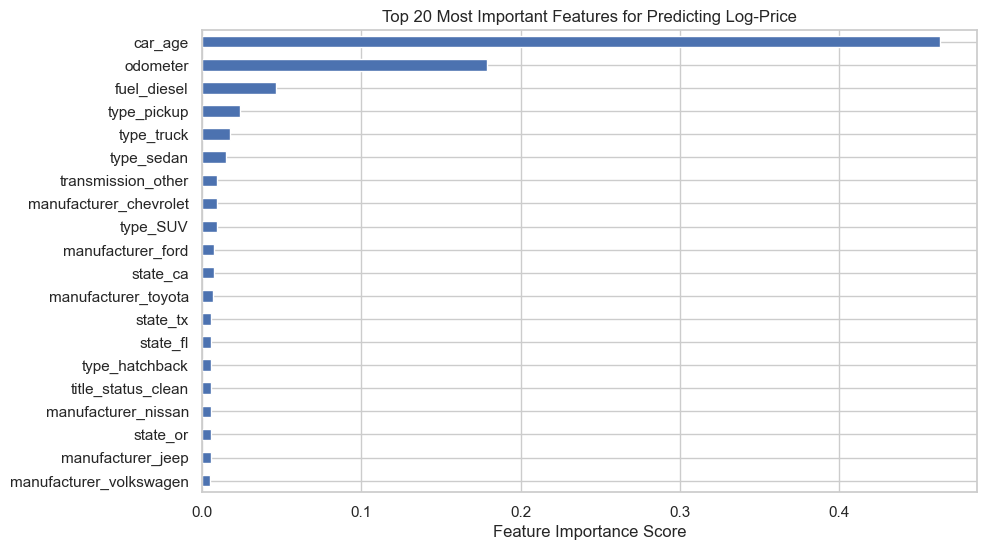

In [59]:
# Get the feature importance scores from the trained Random Forest model
importances = model.feature_importances_

# Extract the feature names (column names of the input DataFrame)
features = X.columns

# Create a pandas Series where the index is the feature names and the values are the importance scores
feat_importances = pd.Series(importances, index=features)

# Sort the features by importance in descending order and keep only the top 20
top_features = feat_importances.sort_values(ascending=False).head(20)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the top 20 features as a horizontal bar chart
top_features.plot(kind='barh')

# Set the title and x-axis label of the plot
plt.title('Top 20 Most Important Features for Predicting Log-Price')
plt.xlabel('Feature Importance Score')

# Invert the y-axis so the most important feature appears at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()


### Step 5: Insights from Feature Importance

Based on a Random Forest model trained on over **347,000 used car listings**, the analysis reveals the following:

- **Car Age** is the single most important predictor of price. Newer cars consistently retain higher value across the dataset.
- **Odometer Reading** is the second strongest factor — confirming that lower-mileage cars are typically priced higher, even when age is similar.
- **Fuel Type** (e.g., gas, diesel, hybrid) and **Vehicle Type** (e.g., pickup, truck, sedan) also influence price. Certain verhicle type categories, such as pickups and trucks, tend to command higher price ranges.
- **Manufacturer** (e.g., Ford, Toyota, Chevrolet) also plays a significant role in determining the price, according to the chart.
- **Location** (e.g., California, Texas) shows a minor but visible effect — possibly due to regional supply/demand or pricing trends.

These findings align with real-world expectations.

---
_This analysis was conducted by Sam Buwalda as part of his Data Analytics portfolio._